<a href="https://colab.research.google.com/github/vinny380/Covid-19-data-analysis/blob/main/Covid_19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

by Vinícius Porfirio Purgato<br>
<img src=https://icon-library.com/images/github-icon-svg/github-icon-svg-16.jpg width=50><a href=https://github.com/vinny380>GitHub</a><br>
<img src=https://image.flaticon.com/icons/png/512/174/174857.png width=45><a href=https://www.linkedin.com/in/vin%C3%ADcius-porfirio-purgato-7891401b3/>  LinkedIn</a>

<img src=https://cdn4.iconfinder.com/data/icons/social-media-2210/24/Medium-512.png width=50>
<a href=https://medium.com/me/stories/public>Medium</a>


---

# **Introduction**

In **December, 2019**, the whole world heard about a new pneumonia outbreak happening in Wuhan, China. A few days later, scientists found that China was not dealing with pneumonia. It was a coronavirus, later named Covid-19 or Sars-Cov-2.<br>
No one expected it to become a problem like it is nowadays, a pandemic in which businesses had to close, **over 2.57M people have died** (while I'm writing this), everyone has to wear **masks** and **anti-vaccine movements** grew big and wide. <br>

<center><img src='https://image.freepik.com/free-vector/prevent-epidemic-rebound-concept-illustration_114360-3008.jpg'></center><br>

Unfortunately, the world changed a lot. Schools were closed. <br>
There is a political war on vaccination. Due to fake news and non-scientific beliefs, **over 40% of people in the USA won't take the vaccines, claiming there weren't enough studies**. Even though scientists indeed worked hard to ensure the safety and effectiveness of the vaccine. There were also huge investments and studies proving how safe it is. **I pay my respect to all the frontline workers and scientists, who have been giving up their personal lives, in order to save others.**<br>
<br>
Keep in mind that **I did this analysis on March 3rd, 2021**. Therefore, **numbers might have changed**, depending on when you read this. <br>
The data I'm using is handled by Our World in Data, a company kept by the University of Oxford, and it is full of data from official sources, like the [World Health Organization](https://www.who.int/) (WHO). Thus I'm not responsible for misleading data on the CSV table. Make sure to check their dataset [here](https://github.com/owid/covid-19-data/tree/master/public/data).<br>



# **Importing Modules and Data**

We only need three libraries for this analysis, these are:
* ``pandas`` - Manipulate our table.
* ``matplotlib`` - Plotting graphs.
* ``seaborn`` - Styling the plots.<br>
Let's import them:

In [ ]:
# Importing our libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for style and appearance
%matplotlib inline
sns.set()

Now I'll assign our dataset to ``df``:


In [ ]:
DATA_PATH = 'https://covid.ourworldindata.org/data/owid-covid-data.csv' # Link to our data
df = pd.read_csv(DATA_PATH) # Assigning df to our dataset

There we go!<br>
As always, let's have a look at our table and try to take any insights from it.<br>
This is a good practice. You should always do it.<br>
To do this I will call ``df.head()``, which basically will show the first five rows.

In [ ]:
# Checking the first 5 rows
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


As you can see above, we have missing values and lot's of columns.<br>

Now let's also check the last five rows.<br>

As we can see, Zimbabwe is the last country and Afghanistan is the first.<br>
Which makes me think  the dateset is ordered alphabetically according to the country's name.

In [ ]:
# Checking the tail
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
73379,ZWE,Africa,Zimbabwe,2021-03-03,36179.0,31.0,31.286,1478.0,6.0,3.143,2434.177,2.086,2.105,99.442,0.404,0.211,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1903.0,387311.0,26.059,0.128,1925.0,0.130,0.016,61.5,tests performed,27970.0,27970.0,NaN,2893.0,2871.0,0.19,0.19,NaN,193.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73380,ZWE,Africa,Zimbabwe,2021-03-04,36223.0,44.0,32.714,1483.0,5.0,3.571,2437.138,2.960,2.201,99.778,0.336,0.240,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2054.0,389365.0,26.197,0.138,1795.0,0.121,0.018,54.9,tests performed,30658.0,30658.0,NaN,2688.0,2807.0,0.21,0.21,NaN,189.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73381,ZWE,Africa,Zimbabwe,2021-03-05,36248.0,25.0,29.143,1484.0,1.0,3.000,2438.820,1.682,1.961,99.846,0.067,0.202,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1534.0,390899.0,26.300,0.103,1708.0,0.115,0.017,58.6,tests performed,31325.0,31325.0,NaN,667.0,2678.0,0.21,0.21,NaN,180.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73382,ZWE,Africa,Zimbabwe,2021-03-06,36260.0,12.0,28.857,1485.0,1.0,3.143,2439.627,0.807,1.942,99.913,0.067,0.211,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600.0,392499.0,26.408,0.108,1750.0,0.118,0.016,60.6,tests performed,32014.0,32014.0,NaN,689.0,2330.0,0.22,0.22,NaN,157.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73383,ZWE,Africa,Zimbabwe,2021-03-07,36271.0,11.0,26.000,1485.0,0.0,3.143,2440.367,0.740,1.749,99.913,0.000,0.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32240.0,32240.0,NaN,226.0,1914.0,0.22,0.22,NaN,129.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


## **Checking what data looks like**
We will also check:
* All the columns names - ``df.columns``
* They `datatype` of each column - ``df.dtypes``

In [ ]:
# Checking columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
# Checking data types
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

By having a look at the ``dtypes`` I learned that they are all float numbers, except for:
* ``tests_units`` - Which vaccine is used.
*``location``  - Country's name.
* ``continent`` - Country's continent.
* ``iso_code`` - Country's code in the International Organization for Standardization.<br>
<br>
Lot's of columns, right?<br>
Let's check the dataset size. To do this I will use the shape method.


In [ ]:
# Shape
print('Number of rows: {}'.format(df.shape[0]))
print('Number of columns: {}'.format(df.shape[1]))

Number of rows: 73384
Number of columns: 59


It turns out we have **73384 rows** and **59 columns**.<br>
Quite a big table, eh?<br>
<br>
Sometimes we have different names for the same thing due to typos, for example *Canada* and *caNada* are not taken as the same.<br>
To avoid this, I will make sure the name of each country starts with a capitalized letter and the rest is all composed by lower cases.<br>
Python allows us to do this by using ``.title()``.<br>

In [ ]:
# Setting all locations to first letter capitalized
df['location'] = df['location'].apply(lambda x: x.title())
# Number of countries available
print('Number of countries available: {}'.format(len(df.location.value_counts())))

Number of countries available: 215


Now we can be sure there are no differences in ``location``.<br>
I also printed the number of countries in our dataset, and it turns we got **208 countries** listed.<br>
<br>
We saw missing values when checking the first five rows, let's check what percentage of the dataset they represent:

In [ ]:
# Null values
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False)

weekly_icu_admissions                    99.121062
weekly_icu_admissions_per_million        99.121062
weekly_hosp_admissions                   98.325248
weekly_hosp_admissions_per_million       98.325248
people_fully_vaccinated                  97.320942
people_fully_vaccinated_per_hundred      97.320942
new_vaccinations                         96.147662
people_vaccinated                        95.960972
people_vaccinated_per_hundred            95.960972
total_vaccinations                       95.417257
total_vaccinations_per_hundred           95.417257
new_vaccinations_smoothed                93.062520
new_vaccinations_smoothed_per_million    93.062520
icu_patients                             89.590374
icu_patients_per_million                 89.590374
hosp_patients                            87.483648
hosp_patients_per_million                87.483648
total_tests                              54.584106
total_tests_per_thousand                 54.584106
new_tests                      

There are lots of missing data, ``weekly_icu_admissions`` has 99.121062% of its values missing.<br>
However, let's remember that Covid isn't done, the pandemic isn't over. Consequently, these values will change in the future. We will also have more data available.<br>
It's also important to remember that having missing values doesn't necessarily means they are actually missing. Wait, what?<br>
Yes, ``new_vaccinations`` has 96% of its values missing, however not all countries have started vaccination, how would they send data they don't have?<br>
Keep that in mind.

## **Cleaning Data**

As I took a look at our *dataset*, I saw that ``location``, the variable with each country's names, also had continents. Which is unnecessary, since ``continent`` contains all continents. Therefore, I decided to remove all them from ``location``. <br>
I will use the ``.drop()`` method:

In [ ]:
# Removing continents from location
df = df.drop(df[df.location == 'South America'].index)
df = df.drop(df[df.location == 'North America'].index)
df = df.drop(df[df.location == 'Asia'].index)
df = df.drop(df[df.location == 'Africa'].index)
df = df.drop(df[df.location == 'Europe'].index)
df = df.drop(df[df.location == 'European Union'].index)

Let's also use column ``date`` as our index.<br>
Then, we can also cast the index to a ``datetime`` type. Doing so will allow us to access Month, Year and Day separately.

In [ ]:
# Setting date as index
df.index = df.date
# Casting index to date_time type
df.index = pd.to_datetime(df.index)

Let's check the size of our *dataset* again:

In [ ]:
# Shape
print('Number of rows: {}'.format(df.shape[0]))
print('Number of columns: {}'.format(df.shape[1]))

Number of rows: 70973
Number of columns: 59


Now we're good to go.

## **Analyzing Data**

### **Country With Highest Number of New Cases on March 6th, 2021**
I want to check which countries had the most death/cases today, March 6th, 2021.<br>
The method ``.loc[]`` allows us to find the data within a given parameter.<br>
I will pass ``2021-03-06`` as the parameter, then I will sort the values by number of ``new_cases`` today in descending order.<br>
By the way, I will jump to the second row, because the first one will be ``World``, which contains the sum of all countries.

In [ ]:
# Country with highest number of cases on March 3rd, 2021
df.loc['2021-03-06'].sort_values(ascending=False, by='new_cases')[1:3]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-06,BRA,South America,Brazil,2021-03-06,10938836.0,69609.0,60229.143,264325.0,1555.0,1443.429,51462.488,327.480,283.352,1243.535,7.316,6.791,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10576542.0,7958939.0,2617603.0,407382.0,322071.0,4.98,3.74,1.23,1515.0,NaN,212559409.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
2021-03-06,USA,North America,United States,2021-03-06,28952970.0,58062.0,60807.857,524362.0,1485.0,1730.000,87470.509,175.412,183.708,1584.163,4.486,5.227,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87912323.0,57358849.0,29776160.0,2904229.0,2158020.0,26.29,17.15,8.90,6453.0,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


Brazil is top-ranked, followed by the USA, they both had 75102 and 67164 new cases yesterday, respectively.
* Brazil - 69609
* USA - 58062<br>

As someone who lives in Brazil, this makes a lot of sense to me. People aren't following quarantine nor social distancing at all. Many even say that the pandemic is over, which is not. Sadly, the government also doesn't provide useful help to the people. Instead, they've been closing businesses and cutting social assistances.

### **Top 5 Countries With The Highest Number of Total Cases**

Now I want to see the top five countries in number of ``total_cases``.<br>
The way we do this is pretty much the same as the example above, but instead of using ``new_cases``, I will use ``total_cases``.

In [ ]:
# the 5 countries with highest cases number
df.loc['2021-03-06'].sort_values(by='total_cases', ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-06,USA,North America,United States,2021-03-06,28952970.0,58062.0,60807.857,524362.0,1485.0,1730.000,87470.509,175.412,183.708,1584.163,4.486,5.227,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87912323.0,57358849.0,29776160.0,2904229.0,2158020.0,26.29,17.15,8.90,6453.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2021-03-06,IND,Asia,India,2021-03-06,11210799.0,18754.0,16295.429,157756.0,100.0,100.714,8123.742,13.590,11.808,114.316,0.072,0.073,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751935.0,220692677.0,159.922,0.545,751042.0,0.544,0.022,46.1,samples tested,20922344.0,17168303.0,3754041.0,1424640.0,954257.0,1.52,1.24,0.27,691.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645
2021-03-06,BRA,South America,Brazil,2021-03-06,10938836.0,69609.0,60229.143,264325.0,1555.0,1443.429,51462.488,327.480,283.352,1243.535,7.316,6.791,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10576542.0,7958939.0,2617603.0,407382.0,322071.0,4.98,3.74,1.23,1515.0,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
2021-03-06,RUS,Europe,Russia,2021-03-06,4263785.0,10909.0,10945.571,87253.0,432.0,417.571,29217.123,74.753,75.003,597.892,2.960,2.861,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354205.0,113280229.0,776.240,2.427,321245.0,2.201,0.034,29.3,tests performed,6583873.0,5082127.0,1501746.0,282019.0,212264.0,4.51,3.48,1.03,1455.0,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
2021-03-06,GBR,Europe,United Kingdom,2021-03-06,4225906.0,6118.0,6162.000,124654.0,159.0,245.000,62250.033,90.122,90.770,1836.225,2.342,3.609,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23335514.0,22213112.0,1122402.0,448396.0,349976.0,34.37,32.72,1.65,5155.0,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932


Let's a plot a bar graph to see how these numbers compare:

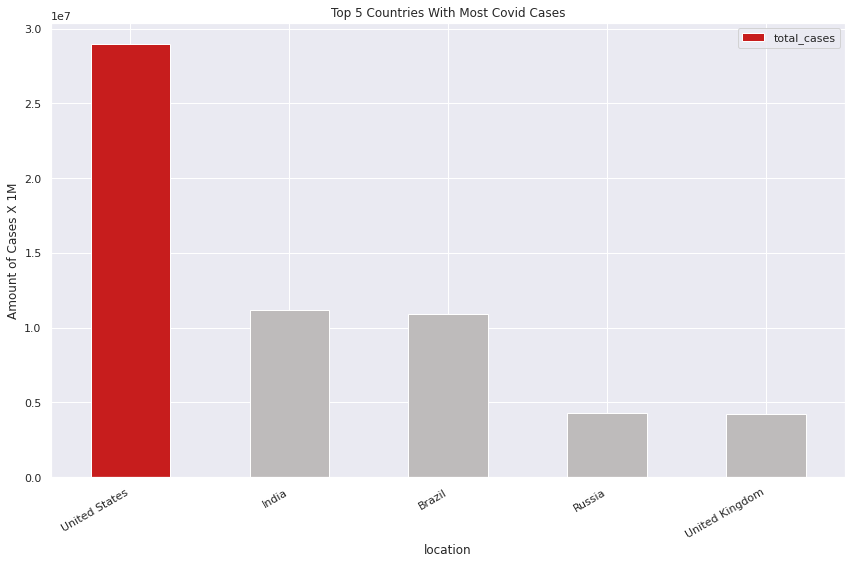

In [ ]:
# Our filtered data
location = df.loc['2021-03-06'].sort_values(by='total_cases', ascending=False)[1:6] 

# Creating figure and axis
fig, ax = plt.subplots(figsize=(12,8))

# Plotting the graph
location.plot(x='location', y='total_cases', kind='bar', color=['#C71D1D', '#BEBBBB', '#BEBBBB', '#BEBBBB', '#BEBBBB'], ax=ax)
ax.set(title='Top 5 Countries With Most Covid Cases', ylabel='Amount of Cases X 1M')
fig.autofmt_xdate()
plt.tight_layout()

The USA is far ahed from all the other countries.<br>
It literally has over two times more cases than India, which is the second most populated country in the world.

### **Top 5 Countries With The Most Deaths**

In [ ]:
# Countries with highest death rate
df.loc['2021-03-06'].sort_values(by='total_deaths', ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-06,USA,North America,United States,2021-03-06,28952970.0,58062.0,60807.857,524362.0,1485.0,1730.000,87470.509,175.412,183.708,1584.163,4.486,5.227,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87912323.0,57358849.0,29776160.0,2904229.0,2158020.0,26.29,17.15,8.90,6453.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2021-03-06,BRA,South America,Brazil,2021-03-06,10938836.0,69609.0,60229.143,264325.0,1555.0,1443.429,51462.488,327.480,283.352,1243.535,7.316,6.791,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10576542.0,7958939.0,2617603.0,407382.0,322071.0,4.98,3.74,1.23,1515.0,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
2021-03-06,MEX,North America,Mexico,2021-03-06,2125866.0,6561.0,5962.571,190357.0,779.0,728.571,16488.177,50.887,46.246,1476.405,6.042,5.651,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3549.0,5180673.0,40.181,0.028,16008.0,0.124,0.267,3.7,people tested,2765805.0,2162358.0,603447.0,33905.0,54628.0,2.15,1.68,0.47,424.0,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779
2021-03-06,IND,Asia,India,2021-03-06,11210799.0,18754.0,16295.429,157756.0,100.0,100.714,8123.742,13.590,11.808,114.316,0.072,0.073,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751935.0,220692677.0,159.922,0.545,751042.0,0.544,0.022,46.1,samples tested,20922344.0,17168303.0,3754041.0,1424640.0,954257.0,1.52,1.24,0.27,691.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645
2021-03-06,GBR,Europe,United Kingdom,2021-03-06,4225906.0,6118.0,6162.000,124654.0,159.0,245.000,62250.033,90.122,90.770,1836.225,2.342,3.609,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23335514.0,22213112.0,1122402.0,448396.0,349976.0,34.37,32.72,1.65,5155.0,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932



Some studies have tried to directly link low income to higher percentage of new cases. However, countries like the USA and U.K made to the top 5, even though they are by no means poor.<br>
Let's also plot this:

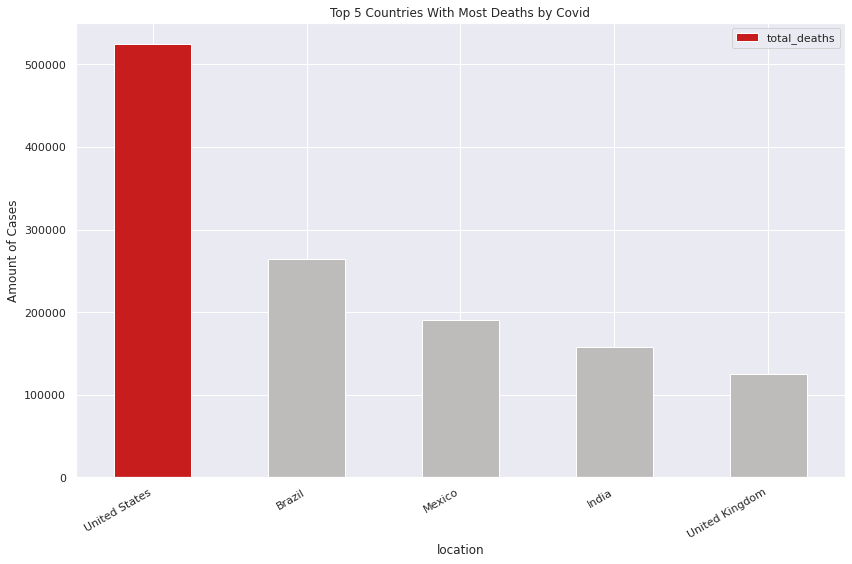

In [ ]:
# Data
data = df.loc['2021-03-06'].sort_values(by='total_deaths', ascending=False)[1:6]

# Creating 1 fig with an Axix
fig, ax = plt.subplots(figsize=(12,8))

# Plotting
data.plot(x='location', y='total_deaths', kind='bar', color=['#C71D1D', '#BEBBBB', '#BEBBBB', '#BEBBBB', '#BEBBBB'], ax=ax)
ax.set(title='Top 5 Countries With Most Deaths by Covid', ylabel='Amount of Cases')
fig.autofmt_xdate()
plt.tight_layout()

### **Day The World Had More Deaths**

In which day did the world have the most deaths?<br>
To answer this question, we will use the same logic as the examples above, however we will only get the top-ranked row.

In [ ]:
# Day with the most cases
df.sort_values(by='new_deaths', ascending=False)[0:1]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-20,OWID_WRL,NaN,World,2021-01-20,96890121.0,691893.0,642974.857,2082033.0,17891.0,13740.857,12430.099,88.763,82.488,267.105,2.295,1.763,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54575321.0,32925152.0,3927090.0,7502224.0,3020719.0,0.7,0.42,0.05,388.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


January 20th, 2021 was when the world had the most deaths in a single day by Covid-19.<br>
This is actually surprising to me. I thought it would be around September-November 2020. However, it shows us that people have not been quarantining, all over the world.
* **January 20th, 2021 - 17 886 deaths**

### **Relation Between Human Development Index and Total Deaths.**

Now let's check which country has the lowest population/death rate. In order to do this, I will use the variable ``total_deaths_per_million``, which will take into consideration death per million people.<br>
Again, the logic is the same as the other examples, but instead of getting the higher number, we want the lowest, therefore ``ascending=True``.<br>
I will also check the number of total deaths.

In [ ]:
# Checking country's HDI 
df.loc['2021-03-06'].sort_values(by='total_deaths_per_million', ascending=True)[:1]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-06,BDI,Africa,Burundi,2021-03-06,2299.0,16.0,16.857,3.0,0.0,0.0,193.343,1.346,1.418,0.252,0.0,0.0,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11890781.0,423.062,17.5,2.562,1.504,702.225,71.7,293.068,6.05,NaN,NaN,6.144,0.8,61.58,0.433


<center><img src='https://cdn.britannica.com/77/7177-004-9D72922D/Flag-Burundi.jpg' width=200></center>
<br>
Burundi was the country with lowest death rate per one million people, these are the statistics of the country:<br>


* Total Cases (``total_cases``) - 2 299
* Total Deaths (``total_deaths``) - 3
* Share of the population with hand washing facilities (``handwashing_facilities``) - 6.144%
* Population (``population``)  - 11 890 781
* Median Age (``median_age``) - 17.5
* Extreme Poverty (``extreme_poverty``) - 71.7%
* Life Expectancy (``life_expectancy``) - 61.58 years old
* Human Development Index (``human_development_index``) - 0.433


### **Total Number of COVID-19 Vaccination Doses Administered**

Now let's see which countries have vaccinated the most people.<br>
I will use the most recent date (2021-03-06) as my parameter, and then I will sort the values in descending order by ``total_vaccinations``.


In [ ]:
# Countries with the highest number of vaccinated
df.loc['2021-03-06'].sort_values(by='total_vaccinations', ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-06,USA,North America,United States,2021-03-06,28952970.0,58062.0,60807.857,524362.0,1485.0,1730.000,87470.509,175.412,183.708,1584.163,4.486,5.227,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87912323.0,57358849.0,29776160.0,2904229.0,2158020.0,26.29,17.15,8.90,6453.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2021-03-06,GBR,Europe,United Kingdom,2021-03-06,4225906.0,6118.0,6162.000,124654.0,159.0,245.000,62250.033,90.122,90.770,1836.225,2.342,3.609,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23335514.0,22213112.0,1122402.0,448396.0,349976.0,34.37,32.72,1.65,5155.0,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2021-03-06,IND,Asia,India,2021-03-06,11210799.0,18754.0,16295.429,157756.0,100.0,100.714,8123.742,13.590,11.808,114.316,0.072,0.073,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751935.0,220692677.0,159.922,0.545,751042.0,0.544,0.022,46.1,samples tested,20922344.0,17168303.0,3754041.0,1424640.0,954257.0,1.52,1.24,0.27,691.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645
2021-03-06,BRA,South America,Brazil,2021-03-06,10938836.0,69609.0,60229.143,264325.0,1555.0,1443.429,51462.488,327.480,283.352,1243.535,7.316,6.791,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10576542.0,7958939.0,2617603.0,407382.0,322071.0,4.98,3.74,1.23,1515.0,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
2021-03-06,TUR,Asia,Turkey,2021-03-06,2769230.0,11770.0,10866.571,28965.0,64.0,66.000,32834.487,139.556,128.844,343.435,0.759,0.783,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138592.0,33993552.0,403.058,1.643,132596.0,1.572,0.082,12.2,tests performed,9883607.0,7509923.0,2373684.0,127318.0,195547.0,11.72,8.90,2.81,2319.0,NaN,8.433907e+07,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.820


If you pay attention, you will realize that the top 3 countries of ``total_vaccinations`` is the same top 3 of ``total_death``.<br>
Let's also plot this info:


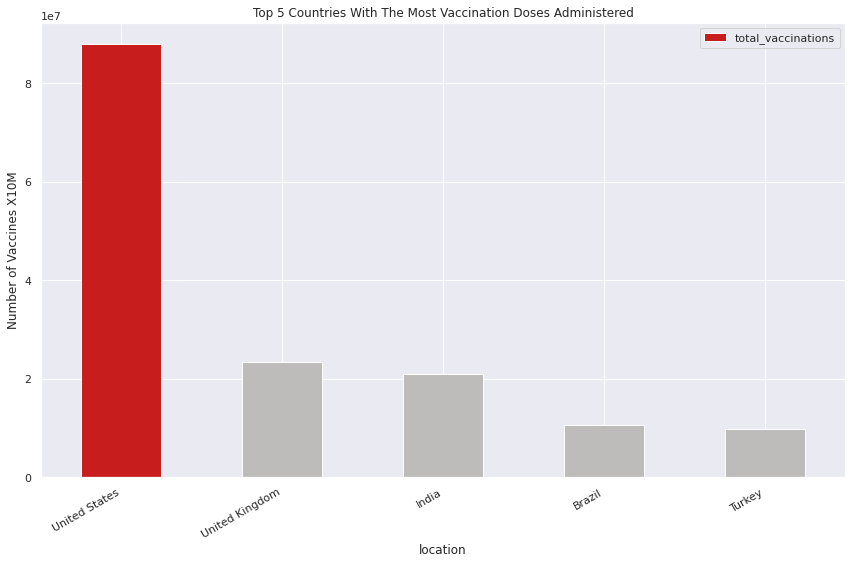

In [ ]:
# Data
vaccinated_countries = df.loc['2021-03-06'].sort_values(by='total_vaccinations', ascending=False)[1:6]

# Creating a fig and an Axis
fig, ax = plt.subplots(figsize=(12,8))

# Plotting
vaccinated_countries.plot(x='location', y='total_vaccinations', ax=ax, kind='bar', color=['#C71D1D','#BEBBBB', '#BEBBBB', '#BEBBBB','#BEBBBB'])
ax.set(title='Top 5 Countries With The Most Vaccination Doses Administered', ylabel='Number of Vaccines X10M')
fig.autofmt_xdate()
plt.tight_layout();


However, vaccination success depends on what percentage of your population take it. Therefore, let's analyze what country had the most people taking it, by the its population rate.

Obs: I will use the second row as the top result, since the first one will be Gibraltar, which has all of its values empty. So I will just ignore it

In [ ]:
# top five countries by total vaccinations per one hundred people
df.loc['2021-03-06'].sort_values(by='total_vaccinations_per_hundred', ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-06,ISR,Asia,Israel,2021-03-06,799727.0,3262.0,3770.286,5856.0,22.0,17.714,92394.802,376.868,435.592,676.561,2.542,2.047,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45940.0,13521135.0,1562.136,5.308,82580.0,9.541,0.046,21.9,tests performed,8646383.0,4929488.0,3716895.0,35884.0,88223.0,99.89,56.95,42.94,10193.0,57.41,8655541.0,402.606,30.6,11.733,7.359,33132.320,0.5,93.320,6.74,15.4,35.4,NaN,2.99,82.97,0.919
2021-03-06,ARE,Asia,United Arab Emirates,2021-03-06,408236.0,2959.0,2806.000,1310.0,14.0,13.857,41275.985,299.179,283.709,132.452,1.416,1.401,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242159.0,32005092.0,3235.975,24.484,223626.0,22.610,0.013,79.7,tests performed,6265860.0,NaN,NaN,30544.0,35824.0,63.35,NaN,NaN,3622.0,NaN,9890400.0,112.442,34.0,1.144,0.526,67293.483,NaN,317.840,17.26,1.2,37.4,NaN,1.20,77.97,0.890
2021-03-06,GBR,Europe,United Kingdom,2021-03-06,4225906.0,6118.0,6162.000,124654.0,159.0,245.000,62250.033,90.122,90.770,1836.225,2.342,3.609,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23335514.0,22213112.0,1122402.0,448396.0,349976.0,34.37,32.72,1.65,5155.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2021-03-06,BHR,Asia,Bahrain,2021-03-06,126126.0,612.0,621.143,469.0,1.0,3.571,74122.743,359.665,365.038,275.626,0.588,2.099,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14934.0,3166332.0,1860.815,8.777,14596.0,8.578,0.043,23.5,units unclear,506519.0,307145.0,199374.0,NaN,7712.0,29.77,18.05,11.72,4532.0,NaN,1701583.0,1935.907,32.4,2.372,1.387,43290.705,NaN,151.689,16.52,5.8,37.6,NaN,2.00,77.29,0.852
2021-03-06,IMN,Europe,Isle Of Man,2021-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24309.0,15824.0,8485.0,426.0,497.0,28.59,18.61,9.98,5845.0,NaN,85032.0,147.872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.40,NaN



There we go, now that's a fair comparison.<br>
Of course Maldives wouldn't have more people vaccinated than the USA, it has a much smaller population. However, when you analyze per one hundred people, then you see that Maldives actually had more people vaccinated.

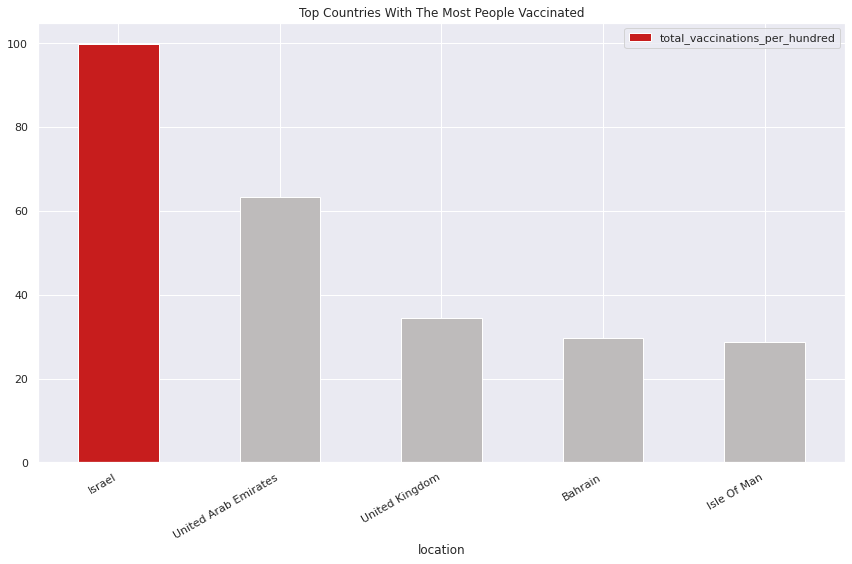

In [ ]:
# Filtered data
data = df.loc['2021-03-06'].sort_values(by='total_vaccinations_per_hundred', ascending=False)[1:6]

# Creating a Fig and an Axis
fig, ax = plt.subplots(figsize=(12,8))

# Plotting
data.plot(x='location', y='total_vaccinations_per_hundred', kind='bar', ax=ax, color=['#C71D1D', '#BEBBBB', '#BEBBBB', '#BEBBBB', '#BEBBBB'])
ax.set(title='Top Countries With The Most People Vaccinated')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

### **Median age of the population, UN projection for 2020 (median_age)**
Now let's check what is the ``median_age`` and median ``life_expectancy`` in the world:


In [ ]:
# printing median age and life expectancy
print("Median Age: {}".format(df['median_age'].mean()))
print("Median Age Standard Deviation: {}".format(df['median_age'].std()))
print("Life expectancy: {}".format(df['life_expectancy'].mean()))
print("Life expectancy Standard Deviation: {}".format(df['life_expectancy'].std()))

Median Age: 30.56236649718894
Median Age Standard Deviation: 9.11804683312625
Life expectancy: 73.13890528374534
Life expectancy Standard Deviation: 7.549603272871112


The world has an average life expectancy of 73 years old. However, Burundi (the country with the least deaths per one million people) has an average of 61.5 and a median age of 17.5 years old.

## **Plottings**

### **Deaths and Spread of Covid-19**
One of the best ways to understand data is by seeing it.<br>

Let's plot some graphs by using ``matplotlib`` and the visuals of ``seaborn``.<br>
Don't about the whole code below, all it's doing is plotting both graphs you are seeing. Each one is called an Axis, all the Axis are contained in a same Figure. Therefore, I plotted two Axis inside a figure.<br>
<br>
I want to see both the increasing of deaths in the world (``new_deaths``) and the spread of the virus (``new_cases``).<br>

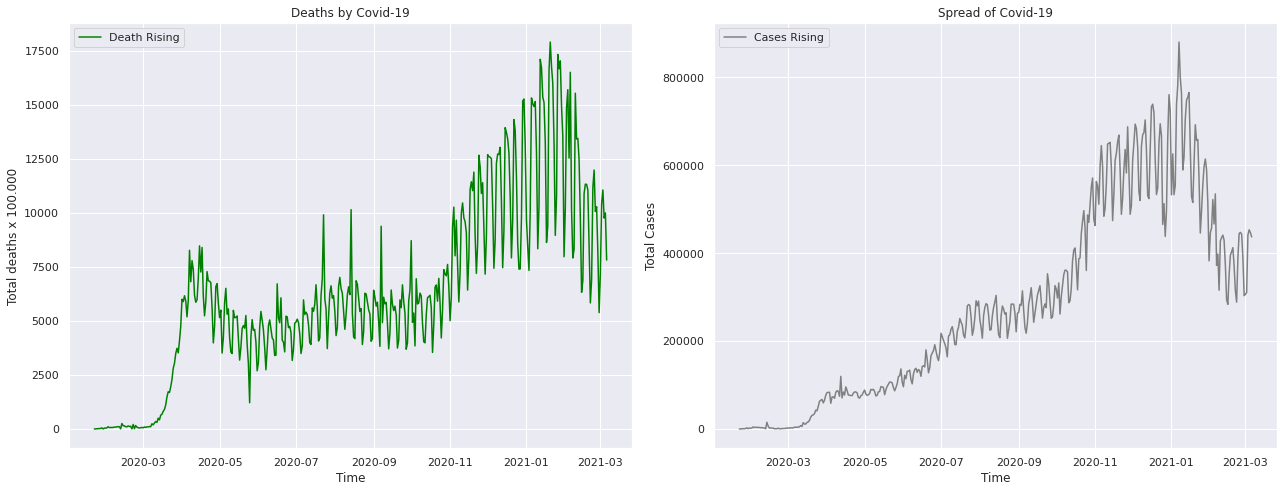

In [ ]:
# Creating Figure and 2 Axis
fig, (ax1, ax2) = plt.subplots(figsize=(18, 7), nrows=1, ncols=2)

# Plotting first graph
location = df.loc[df.location == 'World', 'new_deaths']
ax1.plot(location, label='Death Rising')
ax1.set(title='Deaths by Covid-19', ylabel='Total deaths x 100.000', xlabel='Time')
ax1.get_lines()[0].set(color="green")
ax1.legend()
plt.tight_layout()

# Plotting second graph
location = df.loc[df.location == 'World', 'new_cases']
ax2.plot(location, label='Cases Rising')
ax2.set(title='Spread of Covid-19', ylabel='Total Cases', xlabel='Time')
ax2.get_lines()[0].set(color="grey")
ax2.legend()
plt.tight_layout()

Both graphs were increasing massively. However, around January 2021, they started to decrease. That's the same season when vaccination started in most countries and it proves how vaccines are saving lives. 

### **Scatter Plot of per Capita Gross Domestic Product (GDP) by Total Number of Deaths**

Is there any relations between country's income and number of deaths?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


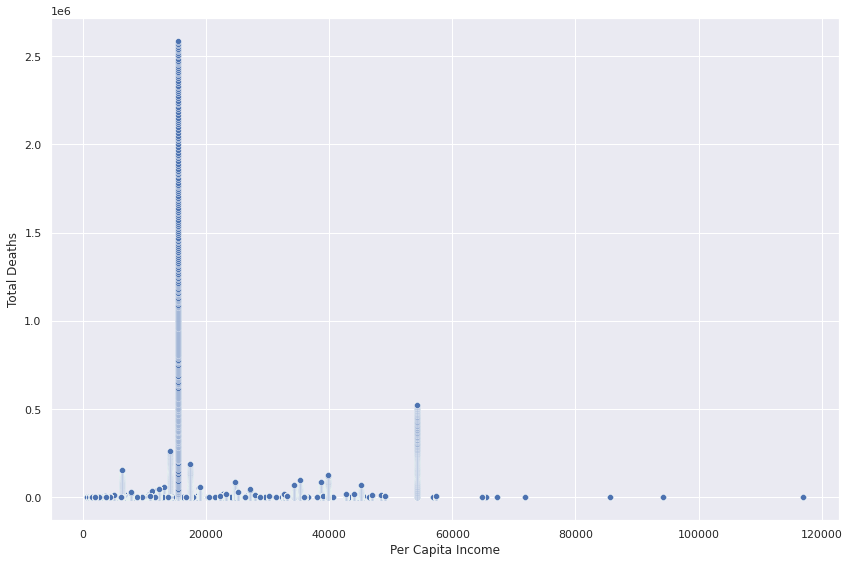

In [ ]:
# Creating figure and 1 axis
fig, ax = plt.subplots(figsize=(12,8))

# Plotting scatter graph
sns.scatterplot('gdp_per_capita', 'total_deaths',data=df, ax=ax)
ax.set(ylabel='Total Deaths', xlabel='Per Capita Income');
plt.tight_layout()

plt.show();

It seems like the richest and the poorest countries are the ones with the least deaths. Burundi is has a low GDP, but even though it has a population of 11.5M people, it had only three deaths by Covid.<br>
<br>
Let's check which country has the worlds median ``gdp_per_capita``.

In [ ]:
print(f"World's median GDP per Capita: U${df.gdp_per_capita.median()}")
print(f"World's mean GDP per Capita: U${df.gdp_per_capita.mean()}")
print(f"World's highest GDP per Capita: U${max(df.gdp_per_capita)}")
print(f"World's lowest GDP per Capita: U${min(df.gdp_per_capita)}")

World's median GDP per Capita: U$12951.839
World's mean GDP per Capita: U$19126.463585398364
World's highest GDP per Capita: U$116935.6
World's lowest GDP per Capita: U$661.24


Now we know the highest, lowest, mean and median values of the world's per capita income. Which countries represent these values?<br>
First of all let's check the median GDP value:

#### **World's Median GDP per Capita**

In [ ]:
# Printing country with the median GDP
df[df['gdp_per_capita'] == 12951.839].sort_values(by='total_deaths', ascending=False)[:1]

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-06,LCA,North America,Saint Lucia,3843.0,29.0,69.571,43.0,0.0,1.143,20928.067,157.927,378.87,234.168,0.0,6.224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183629.0,293.187,34.9,9.721,6.405,12951.839,NaN,204.62,11.62,NaN,NaN,87.202,1.3,76.2,0.759


In [ ]:
# Percentage that Sanint Lucia represents of the worlds gdp per capita
print(f"Percentage Saint Lucia represents of World's GDP per Capita {(12951.839 * 100) / df.gdp_per_capita.sum()}%")


<center><img src='https://upload.wikimedia.org/wikipedia/commons/9/9f/Flag_of_Saint_Lucia.svg' width=150></center>
Saint Lucia is a country in the caribbean. It has the world's median GDP per Capita, which is about U$12951.<br>
<br>
This value is below the World's mean, which is around 19 126 US dolars.
<br>
With a population of 183 629 people and 43 deaths by Covid, around 0.023416780573874498% of people who had Covid died

In [ ]:
# Percentage of people who had Covid and died in Saint Lucia
(43 * 100) / 183629

0.023416780573874498

#### **World's highest GDP per Capita**

In [ ]:
# Printing the highest gdp in the world
df[df['gdp_per_capita'] == 116935.6].sort_values(by='total_deaths', ascending=False)[:1]

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-06,QAT,Asia,Qatar,166475.0,460.0,468.286,262.0,1.0,0.714,57782.552,159.663,162.539,90.939,0.347,0.248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2881060.0,227.322,31.9,1.307,0.617,116935.6,NaN,176.69,16.52,0.8,26.9,NaN,1.2,80.23,0.848



<center><img src='https://cdn11.bigcommerce.com/s-ey7tq/images/stencil/1280x1280/products/3527/18756/qatar-flag__19414.1575342726.jpg?c=2' width=150><br></center>
Qatar is an Asian country and has the world's leading GDP per capita. Which is around U$116 935.<br>
As of today, Qatar has a population of 227 322 people, around 166 475 had Covid, that's around 73% of the population.<br>
However, out of 166 475 Covid cases, only 262 people died, around 0.16%.

In [ ]:
# Priting Qatar's info
print(f"Percentage of Qatar's population who had Covid: {(166475 * 100) / 227322}%")
print(f"Percentage of Qatar's population who had Covid and died: {(262 * 100)/166475.0}%")

Percentage of Qatar's population who had Covid: 73.23312305892082%
Percentage of Qatar's population who had Covid and died: 0.15738098813635681%


#### **World's lowest GDP per Capita**

In [ ]:
# Finding which country has the lowest gdp per capita
df[df.gdp_per_capita == 661.24].sort_values(by='total_deaths', ascending=False)[:1]

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-06,CAF,Africa,Central African Republic,5018.0,0.0,2.0,63.0,0.0,0.0,1038.974,0.0,0.414,13.044,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4829764.0,7.479,18.3,3.655,2.251,661.24,NaN,435.727,6.1,NaN,NaN,16.603,1.0,53.28,0.397


<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Flag_of_the_Central_African_Republic.svg/255px-Flag_of_the_Central_African_Republic.svg.png' width=150></center><br>
The Central African Republic has the world's lowest GDP per Capita.<br>
With a population of 4 829 764 people, 5018 of them had Covid.<br>
Out of the 5018 cases, 63 died, which is around 1.25%.

In [ ]:
# Priting CAR's info
print(f"Percentage of CAR's population who had Covid: {(5018 * 100) / 4829764}%")
print(f"Percentage of CAR's population who had Covid and died: {(63 * 100)/5018}%")

Percentage of CAR's population who had Covid: 0.10389741610563166%
Percentage of CAR's population who had Covid and died: 1.2554802710243125%


Let's visualize how these three nations can be compared:

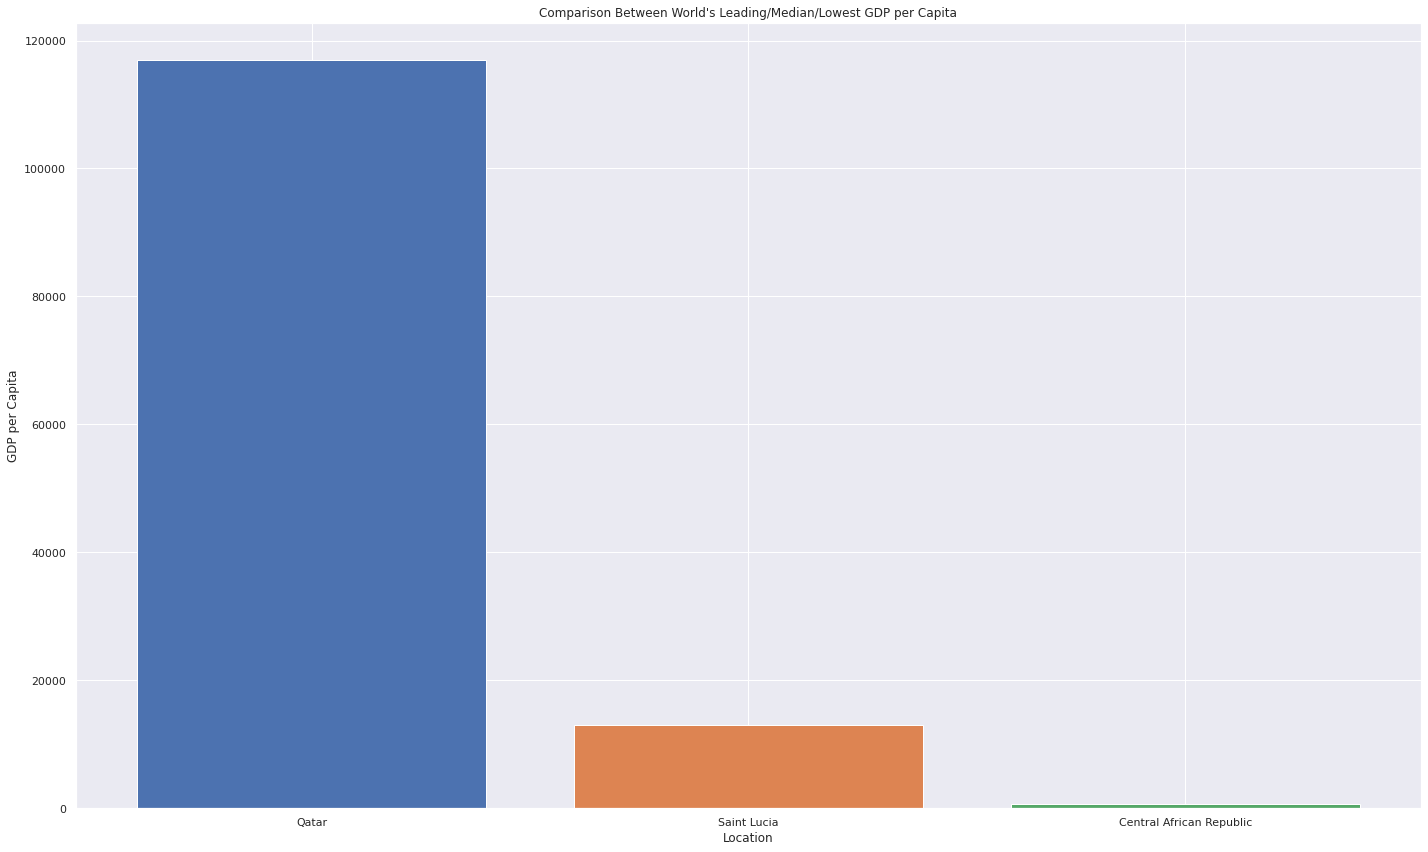

In [ ]:
# Datas
santa_lucia = df[df['gdp_per_capita'] == 12951.839].sort_values(by='total_deaths', ascending=False)[:1] 
qatar = df[df['gdp_per_capita'] == 116935.6].sort_values(by='total_deaths', ascending=False)[:1]
central_african_republic = df[df.gdp_per_capita == 661.24].sort_values(by='total_deaths', ascending=False)[:1]

# Creating a fig within an axis
fig, ax = plt.subplots(figsize=(20,12))

#santa_lucia.plot('location', 'gdp_per_capita', kind='bar', ax=ax )
ax.bar('location', 'gdp_per_capita', data=qatar)
ax.bar('location', 'gdp_per_capita', data=santa_lucia)
ax.bar('location', 'gdp_per_capita', data=central_african_republic)
ax.set(title="Comparison Among World's Leading/Median/Lowest GDP per Capita", ylabel='GDP per Capita', xlabel='Location')
plt.tight_layout()
plt.show()

There it is. The distribution of the countries with the highest, median and lowest ``gdp_per_capita``.

Even after this, we can't say that the relation between GDP and Covid Deaths is non-existent because it depends on lots of proportion tests and etc. However,  it's still interesting.

# **Canada** <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Flag_of_Canada_%28leaf%29.svg/1200px-Flag_of_Canada_%28leaf%29.svg.png' width=40>

Canada has many times been considered the best place to live in the world. It is beautiful, diverse. The people are warm and, in general, willing to help. If you have a chance, visit it. Even though I am Brazilian, one of my parents is Canadian, making me really close to the country because of family, but also because I love it. Therefore, I pay attention to its politics and etc. Unfortunately, Canada hasn't been doing well during the pandemic. Which makes me curious to see how it's been. For that reason, let's analyze it.<br>
I will assign all of its corresponding data to ``df_canada``.

In [ ]:
# Assigning Canada's data to df_canada
df_canada = df[df.location == 'Canada']

Now let's plot three graphs for for ``new_cases``, ``new_vaccinations`` and ``total_deaths``.

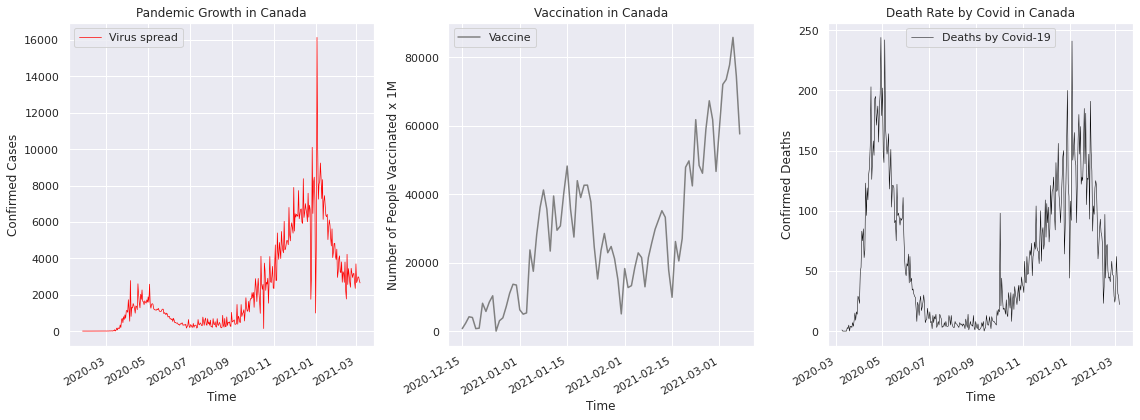

In [ ]:
# Creating figure with 3 axis
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(16,6), nrows=1, ncols=3)

# Plotting graph of new cases over time in canada
ax1.plot(df_canada.new_cases, label='Virus spread')
ax1.set(title='Pandemic Growth in Canada', ylabel='Confirmed Cases', xlabel='Time')
ax1.get_lines()[0].set_color('red')
ax1.get_lines()[0].set_linewidth(w=0.7)
ax1.legend()
ax1.fmt_xdata

# Plotting graph of total vaccination over time in canada
ax2.plot(df_canada.new_vaccinations, label='Vaccine')
ax2.set(title='Vaccination in Canada', ylabel='Number of People Vaccinated x 1M', xlabel='Time')
ax2.get_lines()[0].set_color('Grey')
ax2.legend()
ax2.fmt_xdata

# Plotting death by covid-19 over time in Canada
ax3.plot('new_deaths', data=df_canada, label='Deaths by Covid-19')
ax3.set(title='Death Rate by Covid in Canada', ylabel='Confirmed Deaths', xlabel='Time')
ax3.get_lines()[0].set_color('black')
ax3.get_lines()[0].set_linewidth(w=0.5)
ax3.legend()
fig.autofmt_xdate()

plt.tight_layout()

Canada started its vaccination in mid-december, pay attention to how in January-February, both deaths and new cases numbers started to drop as vaccination increases.<br>
<br>
Now let's check ``total_deaths`` and ``total_cases`` in Canada.<br>
I'll assign today's date (March 6th, 2021) to ``df_canada_today``, that way we only get the most updated result.

In [ ]:
# Getting most recent data of Canada
df_canada_today = df_canada.loc['2021-03-06']

In [ ]:
# Priting stats on Canada
print(f'Total deaths in Canada: {int(df_canada_today.total_deaths)}')
print(f"Total cases in Canada: {int(df_canada_today.total_cases)}")

Total deaths in Canada: 22212
Total cases in Canada: 889551


##### **Canada vs Brazil in The Pandemic**
<center><img src='https://limnonews.files.wordpress.com/2013/05/brasil-canada.jpg' width=300></center>
The majority of nations didn't do well in the pandemic like New Zealand and Australia did. Canada and Brazil are no exceptions.<br>
However, even though Canada has many cases because lots of people don't follow social-distancing, the Government tries to keep them at home. Canada even gave citizens who lost their jobs due to the pandemic quite a good amount of social assistance.<br>
Brazil's president, Bolsonaro, on the other hand, was a negationist and doubted Covid in many public interviews. He also didn't really cooperate to help the states buy external vaccines - like Pfizer, Moderna and others - neither offered help to Brazil's producer - Butantan - simply because they were partnering with Sinovac, a Chinese brand. He also refused to wear masks many times. <br>
Therefore, let's compare both countries.<br>

I will assign all of Brazil's data to ``df_brazil``.

In [ ]:
# Assigning Brazil's data to df_brazil
df_brazil = df[df['location'] == 'Brazil']

Now, let's plot a line chart comparing both country's ``new_cases_per_million``.<br>
That way the comparion become fair, since Canada has the same population as São Paulo, the state I live in.

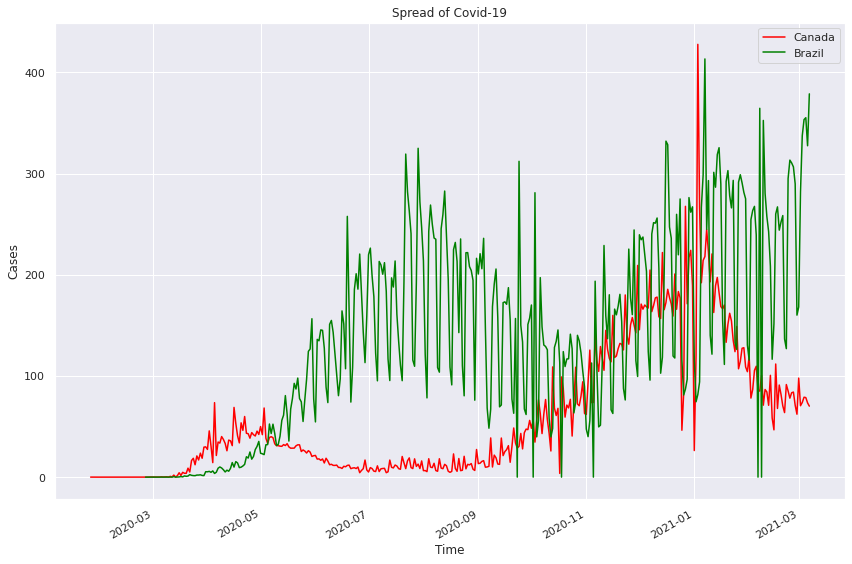

In [ ]:
# Creating figure with one axis
fig, ax = plt.subplots(figsize=(12,8))

# Plotting Brazil vs Canada
ax.plot(df_canada.new_cases_per_million, label='Canada')
ax.plot(df_brazil.new_cases_per_million, label='Brazil')
ax.set(title='Spread of Covid-19', xlabel='Time', ylabel='Cases')
ax.get_lines()[0].set_color('red')
ax.get_lines()[1].set_color('green')
ax.legend()
fig.autofmt_xdate()
plt.tight_layout()

In the beginning, we can see a few moments in which Canada was worse than Brazil. However, the scenario quickly changes. Around January 2021 Canada had one or two days worse than Brazil, but then, by changing the vaccination plan, the process became more robust, so new cases started dropping.<br>
<br>
To make this more visual, I will download and import the library ``pywaffle``, which will provide us with a waffle chart. That's one of my favourite libraries, I highly encourage you to learn it.

In [ ]:
# Installing the library
!pip install pywaffle -q

     |████████████████████████████████| 532kB 13.4MB/s 


In [ ]:
# Importing
from pywaffle import Waffle

I will pass the rounded mean of ``total_cases_per_million`` (which means total confirmed cases of COVID-19 per 1,000,000 people) of each country as our parameters

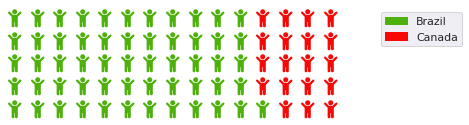

In [ ]:
# Plotting 
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                values={'Brazil': round(df_brazil.loc[:'2021-03-06', 'total_cases_per_million'].mean()),
                        'Canada': round(df_canada.loc[:'2021-03-06', 'total_cases_per_million'].mean())},
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.1, 1)},
                colors=["#4EB00A", "#F50805"],
                icons='child', icon_size=18, 
                )

fig.set_tight_layout(False)
plt.show()

As you can see, out of 75 icons, Canada occupied only 19, while Brazil occupied 56. It shows a big difference in how Brazil and Canada handled the pandemic. Since it is per million people, it doesn't matter the population they have.<br>
<br>
Just so you have an idea in numbers, here's the mean of ``total_cases_per_million`` of both countries:

In [ ]:
# Priting both mean of total_cases_per_million
print(f"Brazil's mean of total cases per million people: {round(df_brazil.loc[:'2021-03-06', 'total_cases_per_million'].mean())}")
print(f"Canada's mean of total cases per million people: {round(df_canada.loc[:'2021-03-06', 'total_cases_per_million'].mean())}")

Brazil's mean of total cases per million people: 18731
Canada's mean of total cases per million people: 6429


# Conclusion

As seen in the data analysis, Covid-19 has only gotten worse, these are some of the insights we took:
* The day we had more deaths was January 20th, 2021.
* Burundi is the country with the least death per million people, even though they have 11.5M living there.
* Qatar has the world's highest GDP per capita.
* The USA is the country with the highest amount of death.
* Israel is the place with most vaccinated people, taking in consideration the nations size.
* Canada had its death rate by Covid-19 increasing, until vaccination started to take place, then it dropped drastically.
* Central African Republic has the lowest GDP per capita in the world, however it had only 63 deaths out of 5M people living there.
<br>


Thanks for reading my notebook. If you like it please follow me on [GitHub](https://github.com/vinny380), [LinkedIn]('https://www.linkedin.com/invin%C3%ADcius-porfirio-purgato-7891401b3/') and [Medium](https://vinny-purgato.medium.com/), I love to post contents. If you have any comments, feel free to message me on LinkedIn.